In [1]:
!pip install eli5 lime neattext pandas spacy numpy seaborn altair streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=c33cdfb1bba73170bfec766d51e0fbdb65d6099d85e9bdea3cb3b6075584634c
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
  Created 

In [2]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#Loading Text Cleaning pkgs
import neattext.functions as nfx

In [ ]:
#Load ML Pkgs
#ESTIMATORS
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#TRANSFORMERS
from sklearn.feature_extraction import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [14]:
import pandas as pd

# Load Dataset and skip lines with parsing errors
df = pd.read_csv("/content/emotion_dataset_2.csv")


In [17]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [20]:
#Value Counts
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

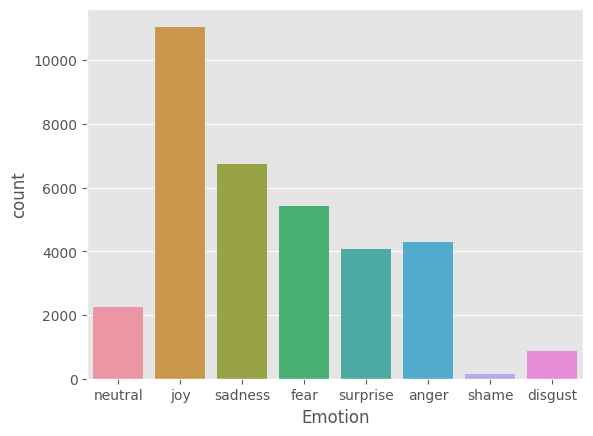

In [21]:
#plot
sns.countplot(x='Emotion',data=df)

In [35]:
!pip install nfx  # Install the 'nfx' library


In [30]:
#Data CLEANING
import nfx
dir(nfx)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [ ]:
# User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [ ]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [38]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [40]:
# FEATURES & LABELS
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']


In [43]:
from sklearn.model_selection import train_test_split

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=42)


In [44]:
# BUILD Pipeline
from sklearn.pipeline import Pipeline

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Creating a Logistic Regression Pipeline
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])


In [48]:
#Check For missing values
import pandas as pd

# Check for missing values in x_train
missing_values = x_train.isnull().sum()
print(missing_values)


316


In [ ]:
# Handlinf Missing Values
# Ensure Data Compatability -> Ensure that the data you're passing to the pipeline is in the appropriate format (byte or unicode string) that the CountVectorizer expects. If needed, preprocess your data to meet this requirement.

Assuming x_train is a Pandas Series of text data and y_train is the corresponding labels
# Example:
-> x_train = pd.Series(['text data 1', 'text data 2', 'text data 3', ...])
-> y_train = ...

1. Reshape x_train to make it a 2D array with a single column
2.  Use SimpleImputer to handle missing values
3.  Fit and transform the preprocessed data

-> Assuming x_test is also a Pandas Series, perform similar preprocessing on x_test
1.  Example:
1.x_test = pd.Series(['text data 1', 'text data 2', 'text data 3', ...])


# Create the pipeline with CountVectorizer and LogisticRegression
1.  Fit the pipeline with preprocessed data

2. Flattening the preprocessed data back to 1D array for fitting
3.  Evaluate the model or perform predictions using x_test_preprocessed
    Final __** pipe_lr.predict(x_test_preprocessed.flatten()) **__

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd


# Reshape x_train to make it a 2D array with a single column
x_train_reshaped = x_train.values.reshape(-1, 1)

# Use SimpleImputer to handle missing values
imputer = SimpleImputer(strategy='constant', fill_value='')

# Fit and transform the preprocessed data
x_train_preprocessed = imputer.fit_transform(x_train_reshaped)

# Assuming x_test is also a Pandas Series, perform similar preprocessing on x_test
# Example:
# x_test = pd.Series(['text data 1', 'text data 2', 'text data 3', ...])
x_test_reshaped = x_test.values.reshape(-1, 1)
x_test_preprocessed = imputer.transform(x_test_reshaped)

# Create the pipeline with CountVectorizer and LogisticRegression
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

# Fit the pipeline with preprocessed data
pipe_lr.fit(x_train_preprocessed.flatten(), y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [52]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [56]:
# Check Accuracy on the test set
accuracy = pipe_lr.score(x_test_preprocessed.flatten(), y_test)
print("Accuracy on test set:", accuracy)


Accuracy on test set: 0.622341444721211


In [57]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [58]:
pipe_lr.predict([ex1])


array(['joy'], dtype=object)

In [59]:
# Prediction Prob
pipe_lr.predict_proba([ex1])

array([[1.55722408e-03, 6.83959715e-03, 1.18109693e-02, 9.50298403e-01,
        9.97433637e-06, 2.21851774e-02, 5.01819368e-05, 7.24847268e-03]])

In [60]:
# To Know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [61]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_03_june_2021.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()